# Final Project
## Linear Regression: Prediction on bike sharing demand

In [1]:
# Import

# data set
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

# linear regression
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

### Importing the merged dataset

In [2]:
#dataset = pd.read_csv('Joint_dataframe.csv')

dataset = pd.read_csv(
    'April_to_June_3_months.csv',
    parse_dates=['timestamp'],
    index_col="timestamp"
)

# exclude timestamp column
#dataset = dataset.loc[:, dataset.columns!='timestamp']

In [3]:
dataset = dataset.drop(["index",'is_holiday','is_weekend'], axis = 1)
dataset = dataset.dropna(axis=0, how='any')
dataset

,In,Out,Station Id,Total,avg_temp,avg_temp_feel,avg_humidity,avg_windSpeed,date,longitude,latitude
timestamp,,,,,,,,,,,
2016-04-01,17,39,2,-22.0,8.520833,7.895833,66.5000,11.166667,1.0,-0.197574,51.4996
2016-04-01,42,24,3,18.0,8.520833,7.895833,66.5000,11.166667,1.0,-0.084606,51.5213
2016-04-01,51,30,4,21.0,8.520833,7.895833,66.5000,11.166667,1.0,-0.120974,51.5301
2016-04-01,44,71,5,-27.0,8.520833,7.895833,66.5000,11.166667,1.0,-0.156876,51.4931
2016-04-01,48,38,6,10.0,8.520833,7.895833,66.5000,11.166667,1.0,-0.144229,51.5181
...,...,...,...,...,...,...,...,...,...,...,...
2016-06-30,1,109,167,-108.0,17.250000,17.250000,74.0625,18.416667,30.0,-0.147624,51.4940
2016-06-30,3,17,168,-14.0,17.250000,17.250000,74.0625,18.416667,30.0,-0.195456,51.5004
2016-06-30,1,30,169,-29.0,17.250000,17.250000,74.0625,18.416667,30.0,-0.165164,51.5147


In [4]:
location = pd.read_csv("Cycle hire docking stations.csv")

In [5]:
#dataset.to_csv (r'C:Desktop\dataframe.csv', index = False, header=True)

### Datasets for each stations

In [6]:
# Extract number of bikes leaving to the station
## for loop with 800 station
## put that info to 800 datasets

obj = dataset.groupby('Station Id')

In [7]:
obj.get_group(1)

,In,Out,Station Id,Total,avg_temp,avg_temp_feel,avg_humidity,avg_windSpeed,date,longitude,latitude
timestamp,,,,,,,,,,,
2016-04-02,13,22,1,-9.0,10.729167,9.458333,62.125000,14.833333,2.0,-0.109971,51.5292
2016-04-03,27,22,1,5.0,11.562500,11.041667,77.541667,11.312500,3.0,-0.109971,51.5292
2016-04-04,52,20,1,32.0,11.083333,10.500000,77.520833,13.583333,4.0,-0.109971,51.5292
2016-04-05,75,12,1,63.0,11.583333,10.916667,65.708333,14.916667,5.0,-0.109971,51.5292
2016-04-06,41,23,1,18.0,9.500000,7.208333,65.812500,26.437500,6.0,-0.109971,51.5292
...,...,...,...,...,...,...,...,...,...,...,...
2016-06-25,11,9,1,2.0,16.062500,16.062500,73.458333,13.562500,25.0,-0.109971,51.5292
2016-06-26,48,26,1,22.0,16.604167,16.604167,71.145833,19.270833,26.0,-0.109971,51.5292
2016-06-27,23,22,1,1.0,18.062500,18.062500,68.958333,16.041667,27.0,-0.109971,51.5292


In [8]:
# add datasets to list

df = []
dropped = [35,79,80,137,179,198,205,237,241,259,283,285,304,342,346,369,385,391,406,407,413,414,415,416,417,418,422,429,434,438,439,493,497,
           502,525,555,567,575,582,585,791,797,798,799,802]

#[35,79,80,179,198,205,237,259,283,285,342,369,385,413,414,415,416,417,418,422,429,434,438,439,493,497,
           #502,525,567,575,582,585,791,797,798,799,802]
    
for i in range(1, len(location['Station.Id'])):
    if i in dropped:
        continue
    df.append(obj.get_group(i))

### Graph of station 1

[Text(0.5, 0, 'timestamp'), Text(0, 0.5, 'In')]

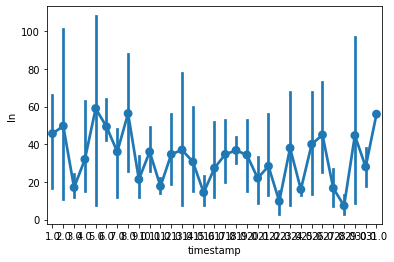

In [9]:
ax = sns.pointplot(x = 'date', y = "In", data = df[1]);
ax.set(xlabel = 'timestamp', ylabel = 'In')

## Comparison

In [10]:
# determine which error is to be used to compare it with, 
# make an array with that error calculated, 
# work out mean , ... , to determine which method is more appropreiate.

## Linear Regression

In [11]:
def standardize(df):
    normalized_df = (df - df.mean()) / df.std()
    normalized_df
    return normalized_df

In [12]:
df[1]

,In,Out,Station Id,Total,avg_temp,avg_temp_feel,avg_humidity,avg_windSpeed,date,longitude,latitude
timestamp,,,,,,,,,,,
2016-04-01,17,39,2,-22.0,8.520833,7.895833,66.500000,11.166667,1.0,-0.197574,51.4996
2016-04-02,11,31,2,-20.0,10.729167,9.458333,62.125000,14.833333,2.0,-0.197574,51.4996
2016-04-03,12,48,2,-36.0,11.562500,11.041667,77.541667,11.312500,3.0,-0.197574,51.4996
2016-04-04,18,33,2,-15.0,11.083333,10.500000,77.520833,13.583333,4.0,-0.197574,51.4996
2016-04-05,61,26,2,35.0,11.583333,10.916667,65.708333,14.916667,5.0,-0.197574,51.4996
...,...,...,...,...,...,...,...,...,...,...,...
2016-06-25,33,35,2,-2.0,16.062500,16.062500,73.458333,13.562500,25.0,-0.197574,51.4996
2016-06-26,73,38,2,35.0,16.604167,16.604167,71.145833,19.270833,26.0,-0.197574,51.4996
2016-06-27,16,39,2,-23.0,18.062500,18.062500,68.958333,16.041667,27.0,-0.197574,51.4996


### Multiple Linear Regression

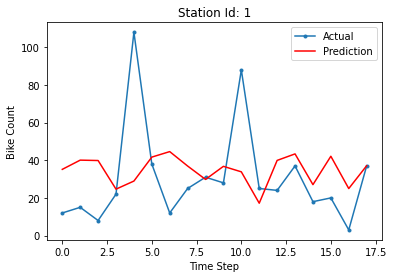

MAE: 19.859531092733793
MSE: 781.9414765854904
RMSE: 27.963216492125692
RMAE: 4.456403380836814


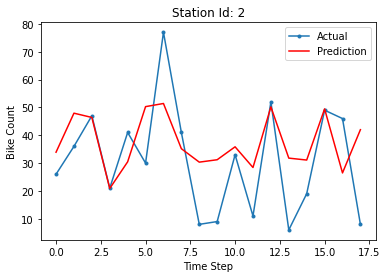

MAE: 13.406169003432707
MSE: 281.8296039464496
RMSE: 16.78778138845183
RMAE: 3.661443568243638


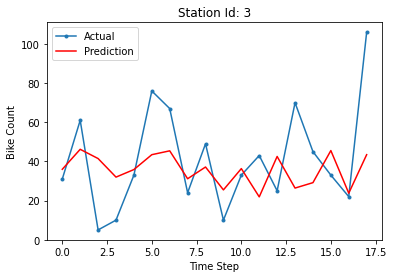

MAE: 19.333490116095618
MSE: 611.8721638851734
RMSE: 24.736049884433317
RMAE: 4.396986481227298


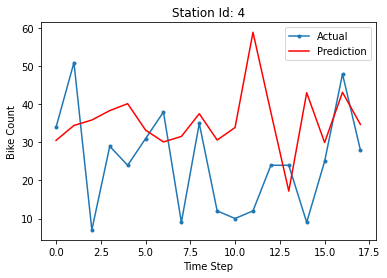

MAE: 15.034031420513259
MSE: 370.9575807970478
RMSE: 19.260259105137912
RMAE: 3.8773742946114007


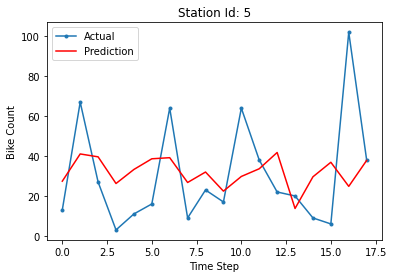

MAE: 20.643638265049926
MSE: 699.218751144786
RMSE: 26.44274477327923
RMAE: 4.5435270732163495


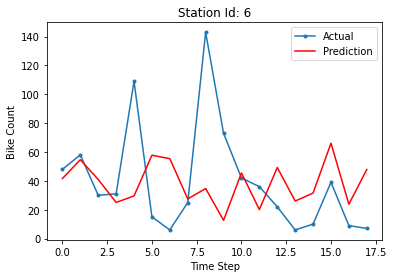

MAE: 30.01758171727436
MSE: 1703.5013015551967
RMSE: 41.27349393442717
RMAE: 5.478830323825913


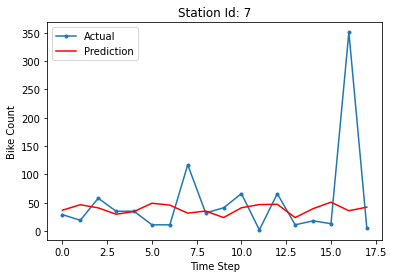

MAE: 41.61914702255576
MSE: 6503.967675815516
RMSE: 80.64718020994606
RMAE: 6.451290337797219


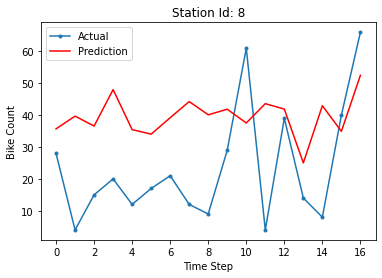

MAE: 21.084764922114637
MSE: 565.1952583932605
RMSE: 23.773835584382688
RMAE: 4.591814992147945


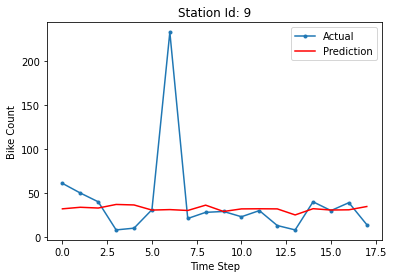

MAE: 22.863570158998765
MSE: 2493.471709820343
RMSE: 49.9346744238945
RMAE: 4.781586573408325

Error Calculation
Average MAE: 20.38619237187688
Average MSE: 1401.1955521943264
Average RMSE: 31.08192357960784
Average RMAE: 4.22392570253149


In [13]:
# split into input (train) and output (test) variables for each of the datasets
totalMAE = 0
totalMSE = 0
totalRMAE = 0
totalRMSE = 0

#no_station = len(location['Station.Id'])
no_station = 10

for i in range(1, no_station):  
    X = df[i].values[:, 4:8]  #'avg_temp','avg_temp_feel','avg_humidity','avg_windSpeed','date'
    y = df[i].values[:, 0:1] # 'In'
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    #print('Training Features Shape:', X_train.shape, 'station:', i)
    #print('Training Labels Shape:', y_train.shape,'station:', i)
    #print('Testing Features Shape:', X_test.shape,'station:', i)
    #print('Testing Labels Shape:', y_test.shape,'station:', i)
    
    regression_model = LinearRegression()
    regression_model.fit(X_train, y_train)
    
    #To retrieve the intercept:
    #print(model.intercept_ ,'station:', i)
    #For retrieving the slope:
    #print(model.coef_ ,'station:', i)
    
    y_pred = regression_model.predict(X_test)
    #linear_df = pd.DataFrame(y_test, y_pred) # list to dataframe (for one station only)
    #station_df.append(linear_df) # append to the datasets that contains all the data for each station

    ## Print heading
    plt.title( 'Station Id: %d' % (i))
    
    ## Plotting in a graph form
    plt.plot(y_test, marker='.', label="Actual")
    plt.plot(y_pred, color='red', label="Prediction")
    plt.ylabel('Bike Count')
    plt.xlabel('Time Step')
    plt.legend()
    plt.show();
    
    ## Calculate error
    from sklearn import metrics
    MAE = metrics.mean_absolute_error(y_test, y_pred)
    MSE = metrics.mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    RMAE = np.sqrt(metrics.mean_absolute_error(y_test, y_pred))
    
    print('MAE:', MAE)
    print('MSE:', MSE)
    print('RMSE:', RMSE)
    print('RMAE:', RMAE)
    totalMAE += MAE
    totalMSE += MSE
    totalRMAE += RMSE
    totalRMSE += RMAE

print('')
print('Error Calculation')
    
print('Average MAE:', totalMAE / no_station)
print('Average MSE:', totalMSE / no_station)
print('Average RMSE:', totalRMAE / no_station)
print('Average RMAE:', totalRMSE / no_station)

### Single Linear Regression

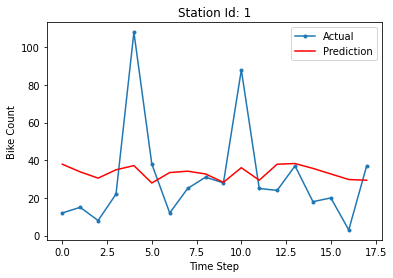

MAE: 18.3365080374043
MSE: 640.5428585342515
RMSE: 25.3089481909907
RMAE: 4.282114902405621


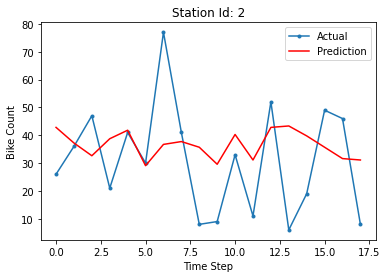

MAE: 16.06661396064258
MSE: 384.276480301769
RMSE: 19.602971211063107
RMAE: 4.008318096239691


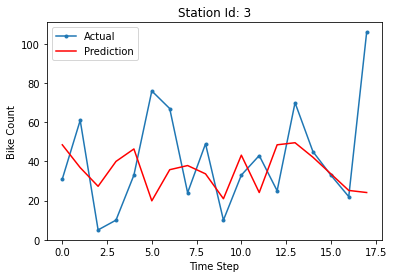

MAE: 22.02548172254331
MSE: 849.799731515282
RMSE: 29.151324695719783
RMAE: 4.693131334465647


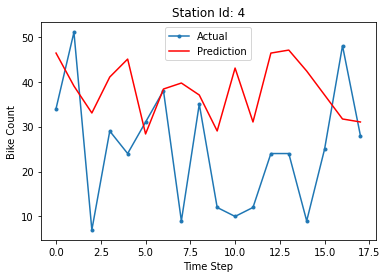

MAE: 16.574287031548444
MSE: 378.8743538715051
RMSE: 19.46469506238166
RMAE: 4.071153034651049


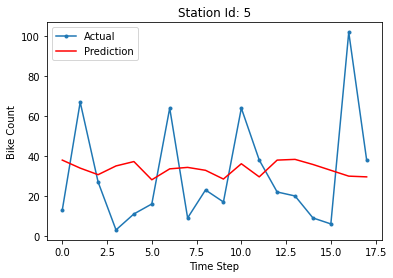

MAE: 22.990175505060428
MSE: 751.4246482249597
RMSE: 27.412125934063553
RMAE: 4.7948071395062835


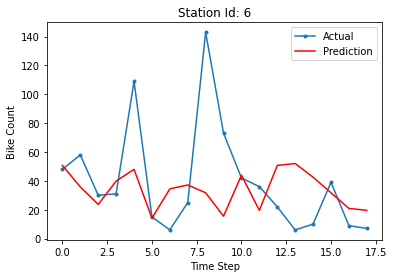

MAE: 26.03734082879969
MSE: 1422.9498431895365
RMSE: 37.722007411980826
RMAE: 5.102679769376057


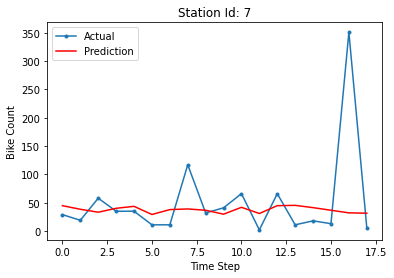

MAE: 39.604166937629905
MSE: 6395.7078056201735
RMSE: 79.97316928583095
RMAE: 6.293184165240193


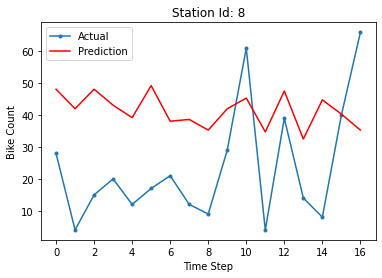

MAE: 23.42268679673822
MSE: 648.6816502139285
RMSE: 25.469229478214068
RMAE: 4.83969903989269


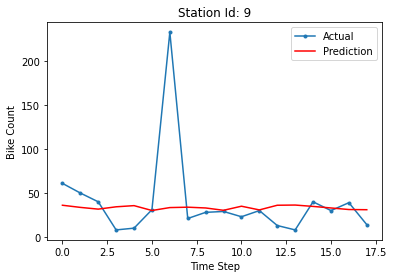

MAE: 23.24193449996777
MSE: 2455.209483406784
RMSE: 49.55007046823227
RMAE: 4.820988954557744

Error Calculation
Average MAE: 20.829919532033465
Average MSE: 1392.746685487819
Average RMSE: 31.365454173847695
Average RMAE: 4.290607643633498


In [14]:
# split into input (train) and output (test) variables for each of the datasets
totalMAE = 0
totalMSE = 0
totalRMAE = 0
totalRMSE = 0

#no_station = len(location['Station.Id'])
no_station = 10

for i in range(1, no_station):  
    X = df[i]['date'].values.reshape(-1,1) # reshape to make it two-dimentional
    y = df[i]['In'].values # Predict
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    regression_model = LinearRegression()
    regression_model.fit(X_train, y_train)
    y_pred = regression_model.predict(X_test)
    
    ## Print heading
    plt.title( 'Station Id: %d' % (i))
    
    ## Plotting in a graph form
    plt.plot(y_test, marker='.', label="Actual")
    plt.plot(y_pred, color='red', label="Prediction")
    plt.ylabel('Bike Count')
    plt.xlabel('Time Step')
    plt.legend()
    plt.show();
    
    ## Calculate error
    from sklearn import metrics
    MAE = metrics.mean_absolute_error(y_test, y_pred)
    MSE = metrics.mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    RMAE = np.sqrt(metrics.mean_absolute_error(y_test, y_pred))
    
    print('MAE:', MAE)
    print('MSE:', MSE)
    print('RMSE:', RMSE)
    print('RMAE:', RMAE)
    totalMAE += MAE
    totalMSE += MSE
    totalRMAE += RMSE
    totalRMSE += RMAE

print('')
print('Error Calculation')  
print('Average MAE:', totalMAE / no_station)
print('Average MSE:', totalMSE / no_station)
print('Average RMSE:', totalRMAE / no_station)
print('Average RMAE:', totalRMSE / no_station)

In [15]:
#linear_df

In [16]:
# lists of predicted and actual data for each of the stations
#station_df

- https://stackabuse.com/linear-regression-in-python-with-scikit-learn/
- https://realpython.com/linear-regression-in-python/